# Decision Tree

## I. Chuẩn bị dữ liệu

In [1]:
from sklearn.preprocessing import OneHotEncoder, LabelEncoder, StandardScaler
import pandas as pd

df = pd.read_csv('../Dataset/archive/WA_Fn-UseC_-HR-Employee-Attrition.csv')

X = df.drop(['Attrition', 'EmployeeNumber', 'Over18', 'EmployeeCount', 'StandardHours'], axis=1)
y = df['Attrition']

col_int32 = ['DailyRate', 'MonthlyIncome', 'MonthlyRate']
col_int16 = ['Age', 'DistanceFromHome', 'Education', 'EnvironmentSatisfaction', 'HourlyRate',
             'JobInvolvement', 'JobLevel', 'JobSatisfaction', 'NumCompaniesWorked',
             'PercentSalaryHike', 'PerformanceRating', 'RelationshipSatisfaction',
             'StockOptionLevel', 'TotalWorkingYears', 'TrainingTimesLastYear',
             'WorkLifeBalance', 'YearsAtCompany', 'YearsInCurrentRole',
             'YearsSinceLastPromotion', 'YearsWithCurrManager']

# ép kiểu
X[col_int32] = X[col_int32].astype('int32')
X[col_int16] = X[col_int16].astype('int16')

X_origin = X.copy()
y_origin = y.copy()

# One-hot cho các cột nominal
one_hot_encoder = OneHotEncoder(
    sparse_output=False,
    handle_unknown='ignore',
    drop='first'
)

encode_cols = [
    'BusinessTravel', 'Department', 'EducationField',
    'Gender', 'JobRole', 'MaritalStatus', 'OverTime'
]

X_encoded_array = one_hot_encoder.fit_transform(X_origin[encode_cols])
encoded_columns = one_hot_encoder.get_feature_names_out(encode_cols)

X_encoded_df = pd.DataFrame(
    X_encoded_array,
    columns=encoded_columns,
    index=X_origin.index
)

# Gộp data sau one-hot
X_encode = pd.concat([X_origin.drop(columns=encode_cols), X_encoded_df], axis=1)

# Encode y
label_encoder = LabelEncoder()
y = label_encoder.fit_transform(y_origin)

# Continuous columns cần scale
continuous_data = [
    'Age', 'DailyRate', 'DistanceFromHome', 'HourlyRate', 'MonthlyIncome',
    'MonthlyRate', 'NumCompaniesWorked', 'PercentSalaryHike',
    'TotalWorkingYears', 'TrainingTimesLastYear', 'YearsAtCompany',
    'YearsInCurrentRole', 'YearsSinceLastPromotion', 'YearsWithCurrManager'
]

# Standard Scaler
scaler = StandardScaler()
X_scaled_df = pd.DataFrame(
    scaler.fit_transform(X_encode[continuous_data]),
    columns=continuous_data,
    index=X_encode.index
).astype('float32')

# Gộp cùng dữ liệu còn lại
X_final = pd.concat(
    [
        X_encode.drop(columns=continuous_data),
        X_scaled_df
    ],
    axis=1
)

# One-hot columns cũng ép về float32
one_hot_cols = X_encoded_df.columns
X_final[one_hot_cols] = X_final[one_hot_cols].astype('float32')

# Có 2 loại dữ liệu:
# X_final là dữ liệu đã đc chuẩn hóa
# X_encode là dữ liệu chưa chuẩn hóa

In [2]:
df

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,4,80,1,6,3,3,2,2,2,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1465,36,No,Travel_Frequently,884,Research & Development,23,2,Medical,1,2061,...,3,80,1,17,3,3,5,2,0,3
1466,39,No,Travel_Rarely,613,Research & Development,6,1,Medical,1,2062,...,1,80,1,9,5,3,7,7,1,7
1467,27,No,Travel_Rarely,155,Research & Development,4,3,Life Sciences,1,2064,...,2,80,1,6,0,3,6,2,0,3
1468,49,No,Travel_Frequently,1023,Sales,2,3,Medical,1,2065,...,4,80,0,17,3,2,9,6,0,8


In [3]:
print(f'Số bản ghi dữ liệu: {len(X)}')
print(f'Số cột dữ liệu (tập X): {len(X.columns)}')


Số bản ghi dữ liệu: 1470
Số cột dữ liệu (tập X): 30


In [4]:
X_origin_not_std = X_encode.copy()
y_origin = y.copy()

In [5]:
X_origin_not_std

,Age,DailyRate,DistanceFromHome,Education,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,JobSatisfaction,MonthlyIncome,...,JobRole_Laboratory Technician,JobRole_Manager,JobRole_Manufacturing Director,JobRole_Research Director,JobRole_Research Scientist,JobRole_Sales Executive,JobRole_Sales Representative,MaritalStatus_Married,MaritalStatus_Single,OverTime_Yes
0,41,1102,1,2,2,94,3,2,4,5993,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0
1,49,279,8,1,3,61,2,2,2,5130,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
2,37,1373,2,2,4,92,2,1,3,2090,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0
3,33,1392,3,4,4,56,3,1,3,2909,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0
4,27,591,2,1,1,40,3,1,2,3468,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1465,36,884,23,2,3,41,4,2,4,2571,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
1466,39,613,6,1,4,42,2,3,1,9991,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
1467,27,155,4,3,2,87,4,2,2,6142,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0
1468,49,1023,2,3,4,63,2,2,2,5390,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0


In [6]:
y_encode = y_origin
y_encode

array([1, 0, 1, ..., 0, 0, 0], shape=(1470,))

## II. Định nghĩa hàm, lớp

In [7]:
from collections import Counter

class Node:
    def __init__(self, feature=None, threshold=None, left=None, right=None, value=None, proba=None):
        self.feature = feature
        self.threshold = threshold
        self.left = left
        self.right = right
        self.value = value
        self.proba = proba

    def is_leaf(self):
        return self.value is not None

class DecisionTree:
    def __init__(self, criterion="gini", max_depth=4, min_samples_leaf=25,
                 min_samples_split=50, random_state=42):
        self.criterion = criterion
        self.max_depth = max_depth
        self.min_samples_split = min_samples_split
        self.min_samples_leaf = min_samples_leaf
        self.random_state = random_state
        self.root = None

        np.random.seed(random_state)

    def fit(self, X, y):
        """Build the decision tree from training data"""
        if hasattr(X, 'values'):
            X = X.values
        if hasattr(y, 'values'):
            y = y.values.ravel()

        self.classes_ = np.unique(y)
        self.n_classes_ = len(self.classes_)

        self.root = self._grow_tree(X, y)

    def _grow_tree(self, X, y, depth=0):
        n_samples, n_features = X.shape
        n_labels = len(np.unique(y))

        # Stopping criteria
        if (depth >= self.max_depth or
            n_labels == 1 or
            n_samples < self.min_samples_split):
            leaf_value = self._most_common_label(y)
            leaf_proba = self._calculate_class_probabilities(y)
            return Node(value=leaf_value, proba=leaf_proba)

        # Find best split
        best_feature, best_threshold = self._best_split(X, y, n_features)

        if best_feature is None:
            leaf_value = self._most_common_label(y)
            leaf_proba = self._calculate_class_probabilities(y)
            return Node(value=leaf_value, proba=leaf_proba)

        # Split data
        left_idxs = X[:, best_feature] <= best_threshold
        right_idxs = ~left_idxs

        # Check min_samples_leaf constraint
        if np.sum(left_idxs) < self.min_samples_leaf or np.sum(right_idxs) < self.min_samples_leaf:
            leaf_value = self._most_common_label(y)
            leaf_proba = self._calculate_class_probabilities(y)
            return Node(value=leaf_value, proba=leaf_proba)

        # Grow children recursively
        left = self._grow_tree(X[left_idxs], y[left_idxs], depth + 1)
        right = self._grow_tree(X[right_idxs], y[right_idxs], depth + 1)

        return Node(best_feature, best_threshold, left, right)

    def _best_split(self, X, y, n_features):
        best_score = float('inf') if self.criterion == "gini" else -1
        split_idx, split_threshold = None, None

        for feature_idx in range(n_features):
            X_column = X[:, feature_idx]
            thresholds = np.unique(X_column)

            for threshold in thresholds:
                left_idxs = X_column <= threshold
                right_idxs = ~left_idxs

                # Check min_samples_leaf
                if np.sum(left_idxs) < self.min_samples_leaf or np.sum(right_idxs) < self.min_samples_leaf:
                    continue

                if self.criterion == "gini":
                    score = self._gini_split(y, X_column, threshold)
                    if score < best_score:
                        best_score = score
                        split_idx = feature_idx
                        split_threshold = threshold
                else:  # entropy
                    score = self._information_gain(y, X_column, threshold)
                    if score > best_score:
                        best_score = score
                        split_idx = feature_idx
                        split_threshold = threshold

        return split_idx, split_threshold

    def _gini_split(self, y, X_column, threshold):
        """Calculate weighted Gini impurity for a split"""
        left_idxs = X_column <= threshold
        right_idxs = ~left_idxs

        if len(y[left_idxs]) == 0 or len(y[right_idxs]) == 0:
            return float('inf')

        n = len(y)
        n_left, n_right = len(y[left_idxs]), len(y[right_idxs])

        gini_left = self._gini_impurity(y[left_idxs])
        gini_right = self._gini_impurity(y[right_idxs])

        weighted_gini = (n_left / n) * gini_left + (n_right / n) * gini_right
        return weighted_gini

    def _gini_impurity(self, y):
        """Calculate Gini impurity"""
        if len(y) == 0:
            return 0

        classes, counts = np.unique(y, return_counts=True)
        probabilities = counts / len(y)
        gini = 1.0 - np.sum(probabilities ** 2)
        return gini

    def _information_gain(self, y, X_column, threshold):
        """Calculate information gain for a split"""
        parent_entropy = self._entropy(y)

        left_idxs = X_column <= threshold
        right_idxs = ~left_idxs

        if len(y[left_idxs]) == 0 or len(y[right_idxs]) == 0:
            return 0

        n = len(y)
        n_left, n_right = len(y[left_idxs]), len(y[right_idxs])
        e_left, e_right = self._entropy(y[left_idxs]), self._entropy(y[right_idxs])
        child_entropy = (n_left / n) * e_left + (n_right / n) * e_right

        ig = parent_entropy - child_entropy
        return ig

    def _entropy(self, y):
        """Calculate entropy"""
        if len(y) == 0:
            return 0

        classes, counts = np.unique(y, return_counts=True)
        probabilities = counts / len(y)
        return -np.sum([p * np.log2(p) for p in probabilities if p > 0])

    def _most_common_label(self, y):
        """Get most common label"""
        counter = Counter(y)
        return counter.most_common(1)[0][0]

    def _calculate_class_probabilities(self, y):
        """Calculate probability distribution over classes in leaf node"""
        proba = np.zeros(self.n_classes_)
        classes, counts = np.unique(y, return_counts=True)

        for c, count in zip(classes, counts):
            class_idx = np.where(self.classes_ == c)[0][0]
            proba[class_idx] = count / len(y)

        return proba

    def predict(self, X):
        """Predict class labels for samples in X"""
        if hasattr(X, 'values'):
            X = X.values
        return np.array([self._traverse_tree(x, self.root) for x in X])

    def predict_proba(self, X):
        """Predict class probabilities for samples in X"""
        if hasattr(X, 'values'):
            X = X.values
        return np.array([self._traverse_tree_proba(x, self.root) for x in X])

    def _traverse_tree(self, x, node):
        if node.is_leaf():
            return node.value

        if x[node.feature] <= node.threshold:
            return self._traverse_tree(x, node.left)
        return self._traverse_tree(x, node.right)

    def _traverse_tree_proba(self, x, node):
        if node.is_leaf():
            return node.proba

        if x[node.feature] <= node.threshold:
            return self._traverse_tree_proba(x, node.left)
        return self._traverse_tree_proba(x, node.right)

In [8]:
import numpy as np
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, f1_score

def evaluate(model, X_train, X_test, y_train, y_test):
    # 1. Huấn luyện mô hình
    model.fit(X_train, y_train)

    # 2. Dự đoán mặc định (Threshold = 0.5)
    y_train_pred = model.predict(X_train)
    y_test_pred = model.predict(X_test)

    print("\n" + "="*40)
    print(" >>> DEFAULT THRESHOLD (0.5) RESULTS")
    print("="*40)

    # Kết quả trên tập TRAIN
    print("\n--- TRAINING SET (Default) ---")
    print("Confusion Matrix:")
    print(confusion_matrix(y_train, y_train_pred))
    print(f"Accuracy: {accuracy_score(y_train, y_train_pred):.4f}")
    print(pd.DataFrame(classification_report(y_train, y_train_pred, output_dict=True)).T)

    # Kết quả trên tập TEST
    print("\n--- TEST SET (Default) ---")
    print("Confusion Matrix:")
    print(confusion_matrix(y_test, y_test_pred))
    print(f"Accuracy: {accuracy_score(y_test, y_test_pred):.4f}")
    print(pd.DataFrame(classification_report(y_test, y_test_pred, output_dict=True)).T)

    # 3. Tìm threshold tối ưu dựa trên tập TRAIN
    print("\n" + "="*40)
    print(" >>> TUNING THRESHOLD (Based on TRAINING Data)")
    print("="*40)

    # Lấy xác suất dự đoán trên tập TRAIN
    y_train_proba = model.predict_proba(X_train)[:, 1]
    y_test_proba = model.predict_proba(X_test)[:, 1]

    best_threshold = 0.5
    best_f1 = 0.0

    # Duyệt qua các ngưỡng để tìm F1 cao nhất trên tập TRAIN
    for threshold in np.arange(0.1, 0.9, 0.05):
        y_train_pred_th = (y_train_proba >= threshold).astype(int)
        f1 = f1_score(y_train, y_train_pred_th)

        if f1 > best_f1:
            best_f1 = f1
            best_threshold = threshold

    print(f"Optimal Threshold found on Train: {best_threshold:.2f}")
    print(f"Max Training F1-score: {best_f1:.4f}")

    # 4. Áp dụng threshold tối ưu vào tập TEST
    y_test_pred_opt = (y_test_proba >= best_threshold).astype(int)

    print("\n" + "="*40)
    print(f" >>> TEST RESULTS WITH OPTIMAL THRESHOLD ({best_threshold:.2f})")
    print("="*40)
    print("Confusion Matrix:")
    print(confusion_matrix(y_test, y_test_pred_opt))
    print(f"Accuracy: {accuracy_score(y_test, y_test_pred_opt):.4f}")

    report_df = pd.DataFrame(classification_report(y_test, y_test_pred_opt, output_dict=True)).T
    print(report_df)

## III. Dự đoán với mô hình

#### 1. Thực hiện với dữ liệu gốc

#### 1.1. Decision Tree (Numpy thuần)

In [9]:
from sklearn.model_selection import train_test_split

X_encode_copy = X_origin_not_std
y_encode_copy = y_encode


In [10]:
X_encode_copy

,Age,DailyRate,DistanceFromHome,Education,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,JobSatisfaction,MonthlyIncome,...,JobRole_Laboratory Technician,JobRole_Manager,JobRole_Manufacturing Director,JobRole_Research Director,JobRole_Research Scientist,JobRole_Sales Executive,JobRole_Sales Representative,MaritalStatus_Married,MaritalStatus_Single,OverTime_Yes
0,41,1102,1,2,2,94,3,2,4,5993,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0
1,49,279,8,1,3,61,2,2,2,5130,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
2,37,1373,2,2,4,92,2,1,3,2090,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0
3,33,1392,3,4,4,56,3,1,3,2909,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0
4,27,591,2,1,1,40,3,1,2,3468,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1465,36,884,23,2,3,41,4,2,4,2571,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
1466,39,613,6,1,4,42,2,3,1,9991,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
1467,27,155,4,3,2,87,4,2,2,6142,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0
1468,49,1023,2,3,4,63,2,2,2,5390,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0


In [11]:
y_encode_copy

array([1, 0, 1, ..., 0, 0, 0], shape=(1470,))

In [12]:
X_train_origin_t1, X_test_origin_t1, y_train_origin_t1, y_test_origin_t1 = train_test_split(
    X_encode_copy, y_encode_copy, test_size=0.2, random_state=42, stratify=y_encode_copy
)

X_train_origin_t2, X_test_origin_t2, y_train_origin_t2, y_test_origin_t2 = train_test_split(
    X_encode_copy, y_encode_copy, test_size=0.3, random_state=42, stratify=y_encode_copy
)

X_train_origin_t3, X_test_origin_t3, y_train_origin_t3, y_test_origin_t3 = train_test_split(
    X_encode_copy, y_encode_copy, test_size=0.4, random_state=42, stratify=y_encode_copy
)

In [13]:
# Test 1: GINI
rf_gini = DecisionTree(
    max_depth=4,
    min_samples_split=50,
    min_samples_leaf=25,     # Mỗi leaf ít nhất 15 samples
    criterion='gini',
    random_state=42
)

In [14]:
evaluate(rf_gini, X_train_origin_t1, X_test_origin_t1, y_train_origin_t1, y_test_origin_t1)


 >>> DEFAULT THRESHOLD (0.5) RESULTS

--- TRAINING SET (Default) ---
Confusion Matrix:
[[961  25]
 [140  50]]
Accuracy: 0.8597
              precision    recall  f1-score      support
0              0.872843  0.974645  0.920939   986.000000
1              0.666667  0.263158  0.377358   190.000000
accuracy       0.859694  0.859694  0.859694     0.859694
macro avg      0.769755  0.618901  0.649149  1176.000000
weighted avg   0.839532  0.859694  0.833116  1176.000000

--- TEST SET (Default) ---
Confusion Matrix:
[[237  10]
 [ 36  11]]
Accuracy: 0.8435
              precision    recall  f1-score     support
0              0.868132  0.959514  0.911538  247.000000
1              0.523810  0.234043  0.323529   47.000000
accuracy       0.843537  0.843537  0.843537    0.843537
macro avg      0.695971  0.596778  0.617534  294.000000
weighted avg   0.813087  0.843537  0.817537  294.000000

 >>> TUNING THRESHOLD (Based on TRAINING Data)
Optimal Threshold found on Train: 0.15
Max Training F1-score

In [15]:
evaluate(rf_gini, X_train_origin_t2, X_test_origin_t2, y_train_origin_t2, y_test_origin_t2)


 >>> DEFAULT THRESHOLD (0.5) RESULTS

--- TRAINING SET (Default) ---
Confusion Matrix:
[[846  17]
 [123  43]]
Accuracy: 0.8639
              precision    recall  f1-score      support
0              0.873065  0.980301  0.923581   863.000000
1              0.716667  0.259036  0.380531   166.000000
accuracy       0.863946  0.863946  0.863946     0.863946
macro avg      0.794866  0.619669  0.652056  1029.000000
weighted avg   0.847835  0.863946  0.835975  1029.000000

--- TEST SET (Default) ---
Confusion Matrix:
[[353  17]
 [ 56  15]]
Accuracy: 0.8345
              precision    recall  f1-score     support
0              0.863081  0.954054  0.906290  370.000000
1              0.468750  0.211268  0.291262   71.000000
accuracy       0.834467  0.834467  0.834467    0.834467
macro avg      0.665915  0.582661  0.598776  441.000000
weighted avg   0.799594  0.834467  0.807272  441.000000

 >>> TUNING THRESHOLD (Based on TRAINING Data)
Optimal Threshold found on Train: 0.15
Max Training F1-score

In [16]:
evaluate(rf_gini, X_train_origin_t3, X_test_origin_t3, y_train_origin_t3, y_test_origin_t3)


 >>> DEFAULT THRESHOLD (0.5) RESULTS

--- TRAINING SET (Default) ---
Confusion Matrix:
[[723  17]
 [104  38]]
Accuracy: 0.8628
              precision    recall  f1-score     support
0              0.874244  0.977027  0.922782  740.000000
1              0.690909  0.267606  0.385787  142.000000
accuracy       0.862812  0.862812  0.862812    0.862812
macro avg      0.782577  0.622316  0.654285  882.000000
weighted avg   0.844728  0.862812  0.836327  882.000000

--- TEST SET (Default) ---
Confusion Matrix:
[[478  15]
 [ 77  18]]
Accuracy: 0.8435
              precision    recall  f1-score     support
0              0.861261  0.969574  0.912214  493.000000
1              0.545455  0.189474  0.281250   95.000000
accuracy       0.843537  0.843537  0.843537    0.843537
macro avg      0.703358  0.579524  0.596732  588.000000
weighted avg   0.810238  0.843537  0.810272  588.000000

 >>> TUNING THRESHOLD (Based on TRAINING Data)
Optimal Threshold found on Train: 0.25
Max Training F1-score: 0.51

#### 1.2. Decision Tree (Thư viện)

In [17]:
from sklearn.tree import DecisionTreeClassifier

# Test 1: GINI
rf_gini_skl = DecisionTreeClassifier(
    max_depth=4,
    min_samples_split=50,
    min_samples_leaf=25,
    criterion='gini',
    random_state=42
)


In [18]:
evaluate(rf_gini_skl, X_train_origin_t1, X_test_origin_t1, y_train_origin_t1, y_test_origin_t1)


 >>> DEFAULT THRESHOLD (0.5) RESULTS

--- TRAINING SET (Default) ---
Confusion Matrix:
[[961  25]
 [140  50]]
Accuracy: 0.8597
              precision    recall  f1-score      support
0              0.872843  0.974645  0.920939   986.000000
1              0.666667  0.263158  0.377358   190.000000
accuracy       0.859694  0.859694  0.859694     0.859694
macro avg      0.769755  0.618901  0.649149  1176.000000
weighted avg   0.839532  0.859694  0.833116  1176.000000

--- TEST SET (Default) ---
Confusion Matrix:
[[237  10]
 [ 35  12]]
Accuracy: 0.8469
              precision    recall  f1-score     support
0              0.871324  0.959514  0.913295  247.000000
1              0.545455  0.255319  0.347826   47.000000
accuracy       0.846939  0.846939  0.846939    0.846939
macro avg      0.708389  0.607417  0.630560  294.000000
weighted avg   0.819229  0.846939  0.822897  294.000000

 >>> TUNING THRESHOLD (Based on TRAINING Data)
Optimal Threshold found on Train: 0.15
Max Training F1-score

In [19]:
evaluate(rf_gini_skl, X_train_origin_t2, X_test_origin_t2, y_train_origin_t2, y_test_origin_t2)



 >>> DEFAULT THRESHOLD (0.5) RESULTS

--- TRAINING SET (Default) ---
Confusion Matrix:
[[846  17]
 [123  43]]
Accuracy: 0.8639
              precision    recall  f1-score      support
0              0.873065  0.980301  0.923581   863.000000
1              0.716667  0.259036  0.380531   166.000000
accuracy       0.863946  0.863946  0.863946     0.863946
macro avg      0.794866  0.619669  0.652056  1029.000000
weighted avg   0.847835  0.863946  0.835975  1029.000000

--- TEST SET (Default) ---
Confusion Matrix:
[[353  17]
 [ 55  16]]
Accuracy: 0.8367
              precision    recall  f1-score     support
0              0.865196  0.954054  0.907455  370.000000
1              0.484848  0.225352  0.307692   71.000000
accuracy       0.836735  0.836735  0.836735    0.836735
macro avg      0.675022  0.589703  0.607574  441.000000
weighted avg   0.803961  0.836735  0.810895  441.000000

 >>> TUNING THRESHOLD (Based on TRAINING Data)
Optimal Threshold found on Train: 0.15
Max Training F1-score

In [20]:
evaluate(rf_gini_skl, X_train_origin_t3, X_test_origin_t3, y_train_origin_t3, y_test_origin_t3)



 >>> DEFAULT THRESHOLD (0.5) RESULTS

--- TRAINING SET (Default) ---
Confusion Matrix:
[[723  17]
 [104  38]]
Accuracy: 0.8628
              precision    recall  f1-score     support
0              0.874244  0.977027  0.922782  740.000000
1              0.690909  0.267606  0.385787  142.000000
accuracy       0.862812  0.862812  0.862812    0.862812
macro avg      0.782577  0.622316  0.654285  882.000000
weighted avg   0.844728  0.862812  0.836327  882.000000

--- TEST SET (Default) ---
Confusion Matrix:
[[478  15]
 [ 76  19]]
Accuracy: 0.8452
              precision    recall  f1-score     support
0              0.862816  0.969574  0.913085  493.000000
1              0.558824  0.200000  0.294574   95.000000
accuracy       0.845238  0.845238  0.845238    0.845238
macro avg      0.710820  0.584787  0.603829  588.000000
weighted avg   0.813701  0.845238  0.813155  588.000000

 >>> TUNING THRESHOLD (Based on TRAINING Data)
Optimal Threshold found on Train: 0.25
Max Training F1-score: 0.51

#### 1.3. Nhận xét

1. Độ chính xác tổng quan
Code thuần numpy cho kết quả rất tốt và gần như tương đương với sklearn:

- Tỉ lệ 8/2 (Train/Test):
    - Training: Giống hệt nhau (Accuracy: 0.8597)
    - Test:
        - NumPy: 0.8435
        - Sklearn: 0.8469 (chênh lệch +0.34%)
    - Optimal threshold with accuracy: giống nhau 0.7925

- Tỉ lệ 7/3:
    - Training: Giống hệt nhau (0.8639)
    - Test:
        - NumPy: 0.8345
        - Sklearn: 0.8367 (chênh lệch +0.22%)
    - Optimal threshold with accuracy: Giống hệt nhau (0.7823)

- Tỉ lệ 6/4:
    - Training: Giống hệt nhau (0.8628)
    - Test:
        - NumPy: 0.8435
        - Sklearn: 0.8452 (chênh lệch +0.17%)
    - Optimal threshold with accuracy: Giống hệt nhau (0.7840)

2. Nhận xét

- Kết quả ổn định qua các split (consistency tốt)
- Tỉ lệ 6/4 cho kết quả tốt nhất cho class 1
- Nhưng tất cả đều YẾU ở việc detect Attrition

### 2. Thực hiện với dữ liệu đã giảm chiều

#### 2.1. Giảm chiều sử dụng Feature Selection

In [21]:
from sklearn.preprocessing import OneHotEncoder, LabelEncoder, StandardScaler
import pandas as pd

df = pd.read_csv('../Dataset/archive/WA_Fn-UseC_-HR-Employee-Attrition.csv')

X = df.drop(['EmployeeNumber', 'Over18', 'EmployeeCount', 'StandardHours'], axis=1)
y = df['Attrition']

col_int32 = ['DailyRate', 'MonthlyIncome', 'MonthlyRate']
col_int16 = ['Age', 'DistanceFromHome', 'Education', 'EnvironmentSatisfaction', 'HourlyRate',
             'JobInvolvement', 'JobLevel', 'JobSatisfaction', 'NumCompaniesWorked',
             'PercentSalaryHike', 'PerformanceRating', 'RelationshipSatisfaction',
             'StockOptionLevel', 'TotalWorkingYears', 'TrainingTimesLastYear',
             'WorkLifeBalance', 'YearsAtCompany', 'YearsInCurrentRole',
             'YearsSinceLastPromotion', 'YearsWithCurrManager']

# ép kiểu
X[col_int32] = X[col_int32].astype('int32')
X[col_int16] = X[col_int16].astype('int16')

X_origin = X.copy()
y_origin = y.copy()

# One-hot cho các cột nominal
one_hot_encoder = OneHotEncoder(
    sparse_output=False,
    handle_unknown='ignore',
    drop='first'
)

encode_cols = [
    'BusinessTravel', 'Department', 'EducationField',
    'Gender', 'JobRole', 'MaritalStatus', 'OverTime'
]

X_encoded_array = one_hot_encoder.fit_transform(X_origin[encode_cols])
encoded_columns = one_hot_encoder.get_feature_names_out(encode_cols)

X_encoded_df = pd.DataFrame(
    X_encoded_array,
    columns=encoded_columns,
    index=X_origin.index
)

# Gộp data sau one-hot
X_encode = pd.concat([X_origin.drop(columns=encode_cols), X_encoded_df], axis=1)

# Encode y
label_encoder = LabelEncoder()
y = label_encoder.fit_transform(y_origin)

In [22]:
X_encode

,Age,Attrition,DailyRate,DistanceFromHome,Education,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,JobSatisfaction,...,JobRole_Laboratory Technician,JobRole_Manager,JobRole_Manufacturing Director,JobRole_Research Director,JobRole_Research Scientist,JobRole_Sales Executive,JobRole_Sales Representative,MaritalStatus_Married,MaritalStatus_Single,OverTime_Yes
0,41,Yes,1102,1,2,2,94,3,2,4,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0
1,49,No,279,8,1,3,61,2,2,2,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
2,37,Yes,1373,2,2,4,92,2,1,3,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0
3,33,No,1392,3,4,4,56,3,1,3,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0
4,27,No,591,2,1,1,40,3,1,2,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1465,36,No,884,23,2,3,41,4,2,4,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
1466,39,No,613,6,1,4,42,2,3,1,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
1467,27,No,155,4,3,2,87,4,2,2,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0
1468,49,No,1023,2,3,4,63,2,2,2,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0


In [23]:
X_encode_copy = X_encode.copy()

In [24]:
X_encode_copy['Attrition'] = X_encode_copy['Attrition'].map({'Yes':1, 'No':0})

In [25]:
X_encode_copy

,Age,Attrition,DailyRate,DistanceFromHome,Education,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,JobSatisfaction,...,JobRole_Laboratory Technician,JobRole_Manager,JobRole_Manufacturing Director,JobRole_Research Director,JobRole_Research Scientist,JobRole_Sales Executive,JobRole_Sales Representative,MaritalStatus_Married,MaritalStatus_Single,OverTime_Yes
0,41,1,1102,1,2,2,94,3,2,4,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0
1,49,0,279,8,1,3,61,2,2,2,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
2,37,1,1373,2,2,4,92,2,1,3,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0
3,33,0,1392,3,4,4,56,3,1,3,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0
4,27,0,591,2,1,1,40,3,1,2,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1465,36,0,884,23,2,3,41,4,2,4,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
1466,39,0,613,6,1,4,42,2,3,1,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
1467,27,0,155,4,3,2,87,4,2,2,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0
1468,49,0,1023,2,3,4,63,2,2,2,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0


<Axes: >

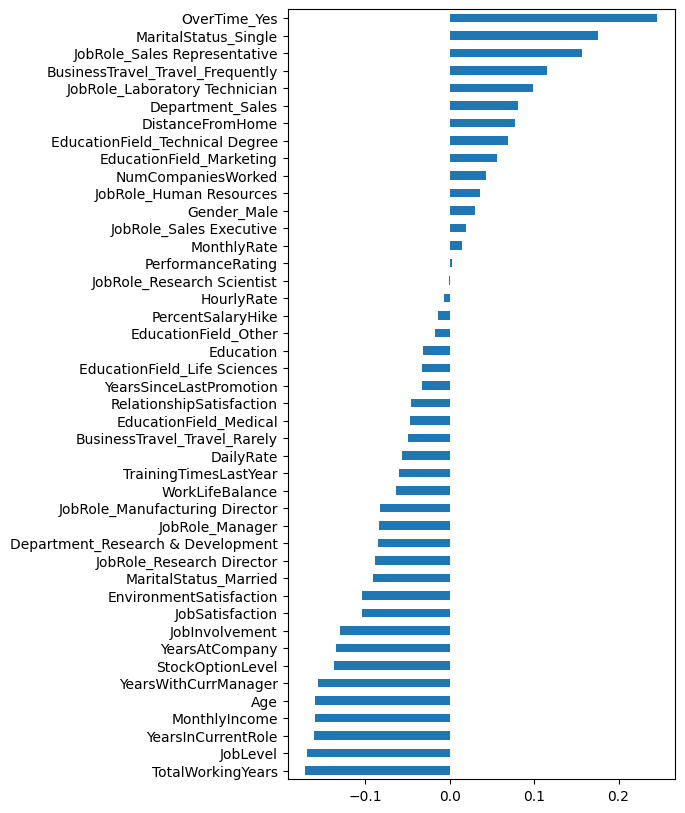

In [26]:
X_encode_copy.drop('Attrition', axis=1).corrwith(X_encode_copy.Attrition).sort_values().plot(kind='barh', figsize=(5, 10))

In [27]:
feature_correlation = X_encode_copy.drop('Attrition', axis=1).corrwith(X_encode_copy.Attrition).sort_values()
model_col = feature_correlation[np.abs(feature_correlation) > 0.02].index
len(model_col)

37

In [28]:
X_encode_copy = X_encode_copy[model_col]

In [29]:
X_encode_copy

,TotalWorkingYears,JobLevel,YearsInCurrentRole,MonthlyIncome,Age,YearsWithCurrManager,StockOptionLevel,YearsAtCompany,JobInvolvement,JobSatisfaction,...,NumCompaniesWorked,EducationField_Marketing,EducationField_Technical Degree,DistanceFromHome,Department_Sales,JobRole_Laboratory Technician,BusinessTravel_Travel_Frequently,JobRole_Sales Representative,MaritalStatus_Single,OverTime_Yes
0,8,2,4,5993,41,5,0,6,3,4,...,8,0.0,0.0,1,1.0,0.0,0.0,0.0,1.0,1.0
1,10,2,7,5130,49,7,1,10,2,2,...,1,0.0,0.0,8,0.0,0.0,1.0,0.0,0.0,0.0
2,7,1,0,2090,37,0,0,0,2,3,...,6,0.0,0.0,2,0.0,1.0,0.0,0.0,1.0,1.0
3,8,1,7,2909,33,0,0,8,3,3,...,1,0.0,0.0,3,0.0,0.0,1.0,0.0,0.0,1.0
4,6,1,2,3468,27,2,1,2,3,2,...,9,0.0,0.0,2,0.0,1.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1465,17,2,2,2571,36,3,1,5,4,4,...,4,0.0,0.0,23,0.0,1.0,1.0,0.0,0.0,0.0
1466,9,3,7,9991,39,7,1,7,2,1,...,4,0.0,0.0,6,0.0,0.0,0.0,0.0,0.0,0.0
1467,6,2,2,6142,27,3,1,6,4,2,...,1,0.0,0.0,4,0.0,0.0,0.0,0.0,0.0,1.0
1468,17,2,6,5390,49,8,0,9,2,2,...,2,0.0,0.0,2,1.0,0.0,1.0,0.0,0.0,0.0


In [30]:
from sklearn.model_selection import train_test_split

X_train_origin_t1, X_test_origin_t1, y_train_origin_t1, y_test_origin_t1 = train_test_split(
    X_encode_copy, y_encode_copy, test_size=0.2, random_state=42, stratify=y_encode_copy
)

X_train_origin_t2, X_test_origin_t2, y_train_origin_t2, y_test_origin_t2 = train_test_split(
    X_encode_copy, y_encode_copy, test_size=0.3, random_state=42, stratify=y_encode_copy
)

X_train_origin_t3, X_test_origin_t3, y_train_origin_t3, y_test_origin_t3 = train_test_split(
    X_encode_copy, y_encode_copy, test_size=0.4, random_state=42, stratify=y_encode_copy
)


##### 2.1.1. Decision Tree (Numpy thuần)

In [31]:
# Test 1: GINI
rf_gini = DecisionTree(
    max_depth=4,
    min_samples_split=50,
    min_samples_leaf=25,     # Mỗi leaf ít nhất 15 samples
    criterion='gini',
    random_state=42
)

In [32]:
evaluate(rf_gini, X_train_origin_t1, X_test_origin_t1, y_train_origin_t1, y_test_origin_t1)


 >>> DEFAULT THRESHOLD (0.5) RESULTS

--- TRAINING SET (Default) ---
Confusion Matrix:
[[961  25]
 [140  50]]
Accuracy: 0.8597
              precision    recall  f1-score      support
0              0.872843  0.974645  0.920939   986.000000
1              0.666667  0.263158  0.377358   190.000000
accuracy       0.859694  0.859694  0.859694     0.859694
macro avg      0.769755  0.618901  0.649149  1176.000000
weighted avg   0.839532  0.859694  0.833116  1176.000000

--- TEST SET (Default) ---
Confusion Matrix:
[[237  10]
 [ 36  11]]
Accuracy: 0.8435
              precision    recall  f1-score     support
0              0.868132  0.959514  0.911538  247.000000
1              0.523810  0.234043  0.323529   47.000000
accuracy       0.843537  0.843537  0.843537    0.843537
macro avg      0.695971  0.596778  0.617534  294.000000
weighted avg   0.813087  0.843537  0.817537  294.000000

 >>> TUNING THRESHOLD (Based on TRAINING Data)
Optimal Threshold found on Train: 0.15
Max Training F1-score

In [33]:
evaluate(rf_gini, X_train_origin_t2, X_test_origin_t2, y_train_origin_t2, y_test_origin_t2)


 >>> DEFAULT THRESHOLD (0.5) RESULTS

--- TRAINING SET (Default) ---
Confusion Matrix:
[[846  17]
 [123  43]]
Accuracy: 0.8639
              precision    recall  f1-score      support
0              0.873065  0.980301  0.923581   863.000000
1              0.716667  0.259036  0.380531   166.000000
accuracy       0.863946  0.863946  0.863946     0.863946
macro avg      0.794866  0.619669  0.652056  1029.000000
weighted avg   0.847835  0.863946  0.835975  1029.000000

--- TEST SET (Default) ---
Confusion Matrix:
[[353  17]
 [ 56  15]]
Accuracy: 0.8345
              precision    recall  f1-score     support
0              0.863081  0.954054  0.906290  370.000000
1              0.468750  0.211268  0.291262   71.000000
accuracy       0.834467  0.834467  0.834467    0.834467
macro avg      0.665915  0.582661  0.598776  441.000000
weighted avg   0.799594  0.834467  0.807272  441.000000

 >>> TUNING THRESHOLD (Based on TRAINING Data)
Optimal Threshold found on Train: 0.15
Max Training F1-score

In [34]:
evaluate(rf_gini, X_train_origin_t3, X_test_origin_t3, y_train_origin_t3, y_test_origin_t3)


 >>> DEFAULT THRESHOLD (0.5) RESULTS

--- TRAINING SET (Default) ---
Confusion Matrix:
[[720  20]
 [101  41]]
Accuracy: 0.8628
              precision    recall  f1-score     support
0              0.876979  0.972973  0.922486  740.000000
1              0.672131  0.288732  0.403941  142.000000
accuracy       0.862812  0.862812  0.862812    0.862812
macro avg      0.774555  0.630853  0.663213  882.000000
weighted avg   0.843999  0.862812  0.839001  882.000000

--- TEST SET (Default) ---
Confusion Matrix:
[[463  30]
 [ 78  17]]
Accuracy: 0.8163
              precision    recall  f1-score     support
0              0.855823  0.939148  0.895551  493.000000
1              0.361702  0.178947  0.239437   95.000000
accuracy       0.816327  0.816327  0.816327    0.816327
macro avg      0.608762  0.559048  0.567494  588.000000
weighted avg   0.775990  0.816327  0.789546  588.000000

 >>> TUNING THRESHOLD (Based on TRAINING Data)
Optimal Threshold found on Train: 0.25
Max Training F1-score: 0.51

##### 2.1.2. Decision Tree (Thư viện)

In [35]:
from sklearn.tree import DecisionTreeClassifier

# Test 1: GINI
rf_gini_skl = DecisionTreeClassifier(
    max_depth=4,
    min_samples_split=50,
    min_samples_leaf=25,
    criterion='gini',
    random_state=42
)


In [36]:
evaluate(rf_gini_skl, X_train_origin_t1, X_test_origin_t1, y_train_origin_t1, y_test_origin_t1)


 >>> DEFAULT THRESHOLD (0.5) RESULTS

--- TRAINING SET (Default) ---
Confusion Matrix:
[[961  25]
 [140  50]]
Accuracy: 0.8597
              precision    recall  f1-score      support
0              0.872843  0.974645  0.920939   986.000000
1              0.666667  0.263158  0.377358   190.000000
accuracy       0.859694  0.859694  0.859694     0.859694
macro avg      0.769755  0.618901  0.649149  1176.000000
weighted avg   0.839532  0.859694  0.833116  1176.000000

--- TEST SET (Default) ---
Confusion Matrix:
[[237  10]
 [ 35  12]]
Accuracy: 0.8469
              precision    recall  f1-score     support
0              0.871324  0.959514  0.913295  247.000000
1              0.545455  0.255319  0.347826   47.000000
accuracy       0.846939  0.846939  0.846939    0.846939
macro avg      0.708389  0.607417  0.630560  294.000000
weighted avg   0.819229  0.846939  0.822897  294.000000

 >>> TUNING THRESHOLD (Based on TRAINING Data)
Optimal Threshold found on Train: 0.15
Max Training F1-score

In [37]:
evaluate(rf_gini_skl, X_train_origin_t2, X_test_origin_t2, y_train_origin_t2, y_test_origin_t2)



 >>> DEFAULT THRESHOLD (0.5) RESULTS

--- TRAINING SET (Default) ---
Confusion Matrix:
[[846  17]
 [123  43]]
Accuracy: 0.8639
              precision    recall  f1-score      support
0              0.873065  0.980301  0.923581   863.000000
1              0.716667  0.259036  0.380531   166.000000
accuracy       0.863946  0.863946  0.863946     0.863946
macro avg      0.794866  0.619669  0.652056  1029.000000
weighted avg   0.847835  0.863946  0.835975  1029.000000

--- TEST SET (Default) ---
Confusion Matrix:
[[353  17]
 [ 55  16]]
Accuracy: 0.8367
              precision    recall  f1-score     support
0              0.865196  0.954054  0.907455  370.000000
1              0.484848  0.225352  0.307692   71.000000
accuracy       0.836735  0.836735  0.836735    0.836735
macro avg      0.675022  0.589703  0.607574  441.000000
weighted avg   0.803961  0.836735  0.810895  441.000000

 >>> TUNING THRESHOLD (Based on TRAINING Data)
Optimal Threshold found on Train: 0.15
Max Training F1-score

In [38]:
evaluate(rf_gini_skl, X_train_origin_t3, X_test_origin_t3, y_train_origin_t3, y_test_origin_t3)



 >>> DEFAULT THRESHOLD (0.5) RESULTS

--- TRAINING SET (Default) ---
Confusion Matrix:
[[720  20]
 [101  41]]
Accuracy: 0.8628
              precision    recall  f1-score     support
0              0.876979  0.972973  0.922486  740.000000
1              0.672131  0.288732  0.403941  142.000000
accuracy       0.862812  0.862812  0.862812    0.862812
macro avg      0.774555  0.630853  0.663213  882.000000
weighted avg   0.843999  0.862812  0.839001  882.000000

--- TEST SET (Default) ---
Confusion Matrix:
[[462  31]
 [ 77  18]]
Accuracy: 0.8163
              precision    recall  f1-score     support
0              0.857143  0.937120  0.895349  493.000000
1              0.367347  0.189474  0.250000   95.000000
accuracy       0.816327  0.816327  0.816327    0.816327
macro avg      0.612245  0.563297  0.572674  588.000000
weighted avg   0.778009  0.816327  0.791083  588.000000

 >>> TUNING THRESHOLD (Based on TRAINING Data)
Optimal Threshold found on Train: 0.25
Max Training F1-score: 0.51

#### 2.2. Sử dụng Smote + Feature Selection

In [39]:
from sklearn.tree import DecisionTreeClassifier

# Test 1: GINI
rf_gini_skl = DecisionTreeClassifier(
    max_depth=4,
    min_samples_split=50,
    min_samples_leaf=25,
    criterion='gini',
    random_state=42
)


In [40]:
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE

# Khởi tạo SMOTE
smote = SMOTE(random_state=42)

X_train_origin_t1, X_test_origin_t1, y_train_origin_t1, y_test_origin_t1 = train_test_split(
    X_encode_copy, y_encode_copy, test_size=0.2, random_state=42, stratify=y_encode_copy
)
X_train_smote_t1, y_train_smote_t1 = smote.fit_resample(X_train_origin_t1, y_train_origin_t1)
print(f"Case 1 (0.2) - Original Train: {y_train_origin_t1.shape}, SMOTE Train: {y_train_smote_t1.shape}")


X_train_origin_t2, X_test_origin_t2, y_train_origin_t2, y_test_origin_t2 = train_test_split(
    X_encode_copy, y_encode_copy, test_size=0.3, random_state=42, stratify=y_encode_copy
)
X_train_smote_t2, y_train_smote_t2 = smote.fit_resample(X_train_origin_t2, y_train_origin_t2)
print(f"Case 2 (0.3) - Original Train: {y_train_origin_t2.shape}, SMOTE Train: {y_train_smote_t2.shape}")


X_train_origin_t3, X_test_origin_t3, y_train_origin_t3, y_test_origin_t3 = train_test_split(
    X_encode_copy, y_encode_copy, test_size=0.4, random_state=42, stratify=y_encode_copy
)
X_train_smote_t3, y_train_smote_t3 = smote.fit_resample(X_train_origin_t3, y_train_origin_t3)
print(f"Case 3 (0.4) - Original Train: {y_train_origin_t3.shape}, SMOTE Train: {y_train_smote_t3.shape}")

Case 1 (0.2) - Original Train: (1176,), SMOTE Train: (1972,)
Case 2 (0.3) - Original Train: (1029,), SMOTE Train: (1726,)
Case 3 (0.4) - Original Train: (882,), SMOTE Train: (1480,)


In [41]:
evaluate(rf_gini_skl, X_train_smote_t1, X_test_origin_t1, y_train_smote_t1, y_test_origin_t1)


 >>> DEFAULT THRESHOLD (0.5) RESULTS

--- TRAINING SET (Default) ---
Confusion Matrix:
[[917  69]
 [232 754]]
Accuracy: 0.8474
              precision    recall  f1-score      support
0              0.798085  0.930020  0.859016   986.000000
1              0.916160  0.764706  0.833610   986.000000
accuracy       0.847363  0.847363  0.847363     0.847363
macro avg      0.857123  0.847363  0.846313  1972.000000
weighted avg   0.857123  0.847363  0.846313  1972.000000

--- TEST SET (Default) ---
Confusion Matrix:
[[227  20]
 [ 28  19]]
Accuracy: 0.8367
              precision    recall  f1-score     support
0              0.890196  0.919028  0.904382  247.000000
1              0.487179  0.404255  0.441860   47.000000
accuracy       0.836735  0.836735  0.836735    0.836735
macro avg      0.688688  0.661642  0.673121  294.000000
weighted avg   0.825768  0.836735  0.830442  294.000000

 >>> TUNING THRESHOLD (Based on TRAINING Data)
Optimal Threshold found on Train: 0.35
Max Training F1-score

In [42]:
evaluate(rf_gini_skl, X_train_smote_t2, X_test_origin_t2, y_train_smote_t2, y_test_origin_t2)


 >>> DEFAULT THRESHOLD (0.5) RESULTS

--- TRAINING SET (Default) ---
Confusion Matrix:
[[805  58]
 [189 674]]
Accuracy: 0.8569
              precision    recall  f1-score      support
0              0.809859  0.932793  0.866990   863.000000
1              0.920765  0.780997  0.845141   863.000000
accuracy       0.856895  0.856895  0.856895     0.856895
macro avg      0.865312  0.856895  0.856065  1726.000000
weighted avg   0.865312  0.856895  0.856065  1726.000000

--- TEST SET (Default) ---
Confusion Matrix:
[[340  30]
 [ 44  27]]
Accuracy: 0.8322
              precision    recall  f1-score   support
0              0.885417  0.918919  0.901857  370.0000
1              0.473684  0.380282  0.421875   71.0000
accuracy       0.832200  0.832200  0.832200    0.8322
macro avg      0.679550  0.649600  0.661866  441.0000
weighted avg   0.819129  0.832200  0.824581  441.0000

 >>> TUNING THRESHOLD (Based on TRAINING Data)
Optimal Threshold found on Train: 0.30
Max Training F1-score: 0.8486

 >

In [43]:
evaluate(rf_gini_skl, X_train_smote_t3, X_test_origin_t3, y_train_smote_t3, y_test_origin_t3)


 >>> DEFAULT THRESHOLD (0.5) RESULTS

--- TRAINING SET (Default) ---
Confusion Matrix:
[[693  47]
 [142 598]]
Accuracy: 0.8723
              precision    recall  f1-score      support
0              0.829940  0.936486  0.880000   740.000000
1              0.927132  0.808108  0.863538   740.000000
accuracy       0.872297  0.872297  0.872297     0.872297
macro avg      0.878536  0.872297  0.871769  1480.000000
weighted avg   0.878536  0.872297  0.871769  1480.000000

--- TEST SET (Default) ---
Confusion Matrix:
[[446  47]
 [ 63  32]]
Accuracy: 0.8129
              precision    recall  f1-score     support
0              0.876228  0.904665  0.890220  493.000000
1              0.405063  0.336842  0.367816   95.000000
accuracy       0.812925  0.812925  0.812925    0.812925
macro avg      0.640646  0.620754  0.629018  588.000000
weighted avg   0.800104  0.812925  0.805818  588.000000

 >>> TUNING THRESHOLD (Based on TRAINING Data)
Optimal Threshold found on Train: 0.25
Max Training F1-score

#### 2.3. Nhận xét

So sánh tổng quan các trường hợp:
- Code numpy thuần vs sklearn:

    - Kết quả gần như tương đương nhau

    - Accuracy, Recall, F1 chỉ lệch rất nhỏ (≈ 0.5–1%)

    - Threshold tối ưu đều = 0.15 hoặc 0.25

    - Confusion matrix gần như giống nhau

=> Code numpy thuần  tương thích với DecisionTreeClassifier của sklearn

Khi dùng threshold mặc định 0.5, đặc điểm rất nhất quán ở mọi tỷ lệ:

- Accuracy TEST ≈ 0.83 – 0.85

- Class 0:

    - Recall ≈ 95–97% (rất cao)

- Class 1:

    - Recall ≈ 18–26% (rất thấp)

    - F1 ≈ 0.28 – 0.35

=> Kết luận: Threshold 0.5 không phù hợp cho bài toán mất cân bằng → mô hình thiên mạnh về class 0.

Khi tuning threshold (0.15 hoặc 0.25). Sau khi tuning theo F1 trên TRAIN:

- Recall class 1 tăng mạnh: ~46–49%

- F1 class 1: ~0.41 – 0.44

- Đổi lại:

    - Accuracy giảm ~4–6%

    - FP tăng (nhưng chấp nhận được nếu ưu tiên phát hiện class 1)

=> Đây là trade-off đúng đắn cho bài toán imbalance.

Vai trò của threshold tuning (rất quan trọng):

| Metric | Default (0.5) | Optimized (0.15, 0.25) |
| :--- | :--- |:-----------------------|
| **Recall class 1** | ~0.2 | ~0.47 – 0.53           |
| **F1 class 1** | ~0.30 | ~0.44                  |
| **Accuracy** | ~0.84 | ↓ ~0.78                |

- Nhận xét

    - Threshold tuning:

        - Cực kỳ hiệu quả với bài toán mất cân bằng

        - Hy sinh accuracy để: bắt được nhiều Attrition = Yes

    - Đây là điều rất đúng trong bài toán HR / churn

=> Nếu đánh giá theo business, mô hình sau threshold tuning tốt hơn

So sánh không dùng feature selection vs có feature selection:

| Tiêu chí                      | Không FS                | Có FS              |
|:------------------------------|:------------------------|:-------------------|
| **Accuracy test (default)**   | ~0.78 – 0.84            | ~0.78 – 0.81       |
| **F1 (class 1, default)**     | thấp (~0.21–0.23)       | không cải thiện rõ |
| **F1 (threshold=0.15, 0.25)** | ~0.41–0.44              | ≈ giống hệt        |
| **Recall class 1**            | tăng khi tăng threshold | giống nhau         |


Nhận xét quan trọng:

- Feature selection dựa trên correlation

- Không giúp cải thiện rõ hiệu quả


Đánh giá hiện tượng Overfitting:
| Metric | Train | Test |
| :--- | :--- | :--- |
| **Accuracy** | ~0.86 | ~0.83–0.85 |
| **Recall class 1** | ~0.26 | ~0.21–0.25 |
| **F1 class 1** | ~0.38 | ~0.29–0.35 |


- Kết luận:

    - Không có overfitting nghiêm trọng

    - Khoảng cách Train–Test:

        - Nhỏ

        - Ổn định qua các split

    - max_depth=4, min_samples_leaf=25 đã kiểm soát tốt độ phức tạp

- Mô hình đang ở trạng thái:

    - Underfitting nhẹ cho class 1 (Attrition = Yes)
    - Không phải overfitting

- LDA + SMOTE bị "Ảo tưởng" (Overfitting nặng):

- Trên tập Train: Kết quả cực kỳ cao (F1 > 0.84) do mô hình học thuộc lòng các điểm dữ liệu giả được sinh ra.

- Trên tập Test: Hiệu suất sụt giảm thê thảm (F1 tụt xuống chỉ còn ~0.41 - 0.44). Điều này chứng tỏ SMOTE tạo ra nhiễu, làm mô hình mất khả năng tổng quát hóa trên dữ liệu thực tế.

=> Kết luận: Việc dùng SMOTE trong trường hợp này là không cần thiết và phản tác dụng. Ta nên chọn phương án chỉ dùng LDA và áp dụng Optimal Threshold (ngưỡng tối ưu ~0.15 đến 0.25) để có mô hình đơn giản, chạy nhanh hơn và đáng tin cậy hơn.

Mặc dù mô hình không xuất hiện hiện tượng overfitting rõ rệt, việc điều chỉnh thêm các tham số regularization như max_features='sqrt' hoặc class_weight='balanced' có thể giúp cải thiện khả năng tổng quát hóa và nâng cao hiệu quả dự đoán đối với lớp thiểu số.

## IV. Trực quan hóa

In [44]:
from sklearn.tree import DecisionTreeClassifier

rf_gini_skl = DecisionTreeClassifier(
    max_depth=4,
    min_samples_split=50,
    min_samples_leaf=25,
    criterion='gini',
    random_state=42
)
rf_gini = DecisionTree(
    max_depth=4,
    min_samples_split=50,
    min_samples_leaf=25,     # Mỗi leaf ít nhất 15 samples
    criterion='gini',
    random_state=42
)
rf_gini_skl.fit(X_train_origin_t3, y_train_origin_t3)
rf_gini.fit(X_train_origin_t3, y_train_origin_t3)

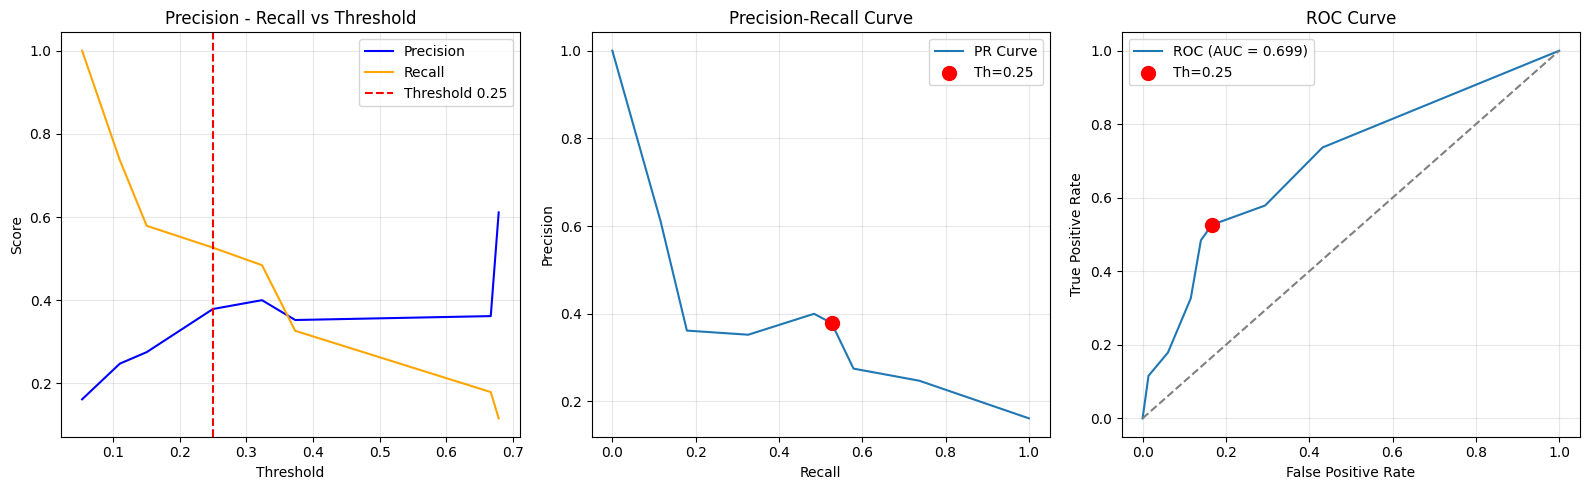

In [45]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics import precision_recall_curve, roc_curve, roc_auc_score

y_scores = rf_gini.predict_proba(X_test_origin_t3)[:, 1]

# Tính toán các chỉ số
precisions, recalls, pr_thresholds = precision_recall_curve(y_test_origin_t3, y_scores)
fpr, tpr, roc_thresholds = roc_curve(y_test_origin_t3, y_scores)
auc_score = roc_auc_score(y_test_origin_t3, y_scores)

target_threshold = 0.25

# 1. Tìm index gần 0.25 nhất trong mảng pr_thresholds
idx_pr = np.argmin(np.abs(pr_thresholds - target_threshold))
p_at_th = precisions[idx_pr]
r_at_th = recalls[idx_pr]

# 2. Tìm index gần 0.25 nhất trong mảng roc_thresholds
idx_roc = np.argmin(np.abs(roc_thresholds - target_threshold))
fpr_at_th = fpr[idx_roc]
tpr_at_th = tpr[idx_roc]

plt.figure(figsize=(16, 5))

# Biểu đồ 1: Precision-Recall vs Threshold
plt.subplot(1, 3, 1)
plt.plot(pr_thresholds, precisions[:-1], label="Precision", color='blue')
plt.plot(pr_thresholds, recalls[:-1], label="Recall", color='orange')
plt.axvline(x=target_threshold, color='red', linestyle='--', label=f'Threshold {target_threshold}')
plt.xlabel("Threshold")
plt.ylabel("Score")
plt.title("Precision - Recall vs Threshold")
plt.legend()
plt.grid(True, alpha=0.3)

# Biểu đồ 2: Precision-Recall Curve
plt.subplot(1, 3, 2)
plt.plot(recalls, precisions, label='PR Curve')
plt.scatter(r_at_th, p_at_th, color='red', s=100, zorder=5, label=f'Th={target_threshold}')
plt.xlabel("Recall")
plt.ylabel("Precision")
plt.title("Precision-Recall Curve")
plt.legend()
plt.grid(True, alpha=0.3)

# Biểu đồ 3: ROC Curve
plt.subplot(1, 3, 3)
plt.plot(fpr, tpr, label=f'ROC (AUC = {auc_score:.3f})')
plt.plot([0, 1], [0, 1], linestyle='--', color='gray')
plt.scatter(fpr_at_th, tpr_at_th, color='red', s=100, zorder=5, label=f'Th={target_threshold}')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve")
plt.legend()
plt.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

- Biểu đồ trái (Precision-Recall vs Threshold):

Quyết định chọn threshold = 0.25 là rất hợp lý về mặt chiến lược. Ta có thể thấy ngay sau mốc 0.25, đường màu cam (Recall) bắt đầu lao dốc rất nhanh (từ ~0.5 xuống ~0.25). Chọn 0.25 là điểm "chốt chặn" cuối cùng để giữ được khả năng phát hiện Class 1 ở mức ~50%.

- Biểu đồ giữa (PR Curve):

Đường cong nằm khá thấp, cho thấy bài toán này khó đối với mô hình hiện tại. Tại điểm chấm đỏ (Recall ~0.5), Precision chỉ đạt khoảng ~0.25.

Nghĩa là: Để bắt được 50% số ca Class 1, ta phải chấp nhận việc cứ 4 lần báo động thì chỉ có 1 lần đúng (3 lần báo động giả).

- Biểu đồ phải (ROC Curve):

AUC = 0.699: Mức này được đánh giá là Trung bình - Khá. Nó tốt hơn đoán mò (0.5) nhưng chưa đạt mức xuất sắc (thường là > 0.8).

Dáng điệu gấp khúc (Jagged/Stepped): Đặc trưng của Decision Tree với số lượng node lá hạn chế. Điều này xác nhận mô hình phân chia không gian dữ liệu thành các vùng chữ nhật rời rạc.

=> AUC ~0.69 là một kết quả "khả quan" (promising) cho một mô hình cơ sở (baseline) trên tập dữ liệu khó, và có thể cải thiện thêm bằng các phương pháp nâng cao (Ensemble Learning) trong tương lai.

In [46]:
import matplotlib.pyplot as plt
import numpy as np

def plot_prediction_comparison(model,
                               X_train_val, y_train_val,
                               X_test, y_test,
                               threshold=0.5):

    # --- 1. CHUẨN HÓA DỮ LIỆU ĐẦU VÀO (Tránh lỗi Pandas Series) ---
    # Chuyển hết về numpy array để index hoạt động đúng
    y_train_val = np.array(y_train_val)
    y_test = np.array(y_test)

    # --- 2. DỰ ĐOÁN ---
    # Train/Val
    y_train_proba = model.predict_proba(X_train_val)[:, 1]
    y_train_pred = (y_train_proba >= threshold).astype(int)

    # Test
    y_test_proba = model.predict_proba(X_test)[:, 1]
    y_test_pred = (y_test_proba >= threshold).astype(int)

    # --- 3. VẼ BIỂU ĐỒ ---
    plt.figure(figsize=(16, 6))

    plt.subplot(1, 2, 1)
    idx_train = np.arange(len(y_train_val))

    # Tìm index đúng/sai
    correct_train = (y_train_pred == y_train_val)
    wrong_train = (y_train_pred != y_train_val)

    # Vẽ điểm (thêm alpha để nhìn xuyên thấu các điểm đè nhau)
    plt.scatter(idx_train[correct_train], y_train_val[correct_train],
                color='green', label='Đúng', s=30, alpha=0.6)
    plt.scatter(idx_train[wrong_train], y_train_val[wrong_train],
                color='red', label='Sai', s=30, marker='x', alpha=0.8)

    plt.title(f"Tập TRAIN/VAL (Threshold={threshold})")
    plt.xlabel("Index mẫu")
    plt.ylabel("Nhãn thực tế (0/1)")
    plt.yticks([0, 1]) # Chỉ hiện số 0 và 1 ở trục Y
    plt.legend()
    plt.grid(True, linestyle='--', alpha=0.5)

    # ====== SUBPLOT 2: TEST ======
    plt.subplot(1, 2, 2)
    idx_test = np.arange(len(y_test))

    # Tìm index đúng/sai
    correct_test = (y_test_pred == y_test)
    wrong_test = (y_test_pred != y_test)

    plt.scatter(idx_test[correct_test], y_test[correct_test],
                color='green', label='Đúng', s=30, alpha=0.6)
    plt.scatter(idx_test[wrong_test], y_test[wrong_test],
                color='red', label='Sai', s=30, marker='x', alpha=0.8)

    plt.title(f"Tập TEST (Threshold={threshold})")
    plt.xlabel("Index mẫu")
    plt.yticks([0, 1])
    plt.legend()
    plt.grid(True, linestyle='--', alpha=0.5)

    plt.tight_layout()
    plt.show()

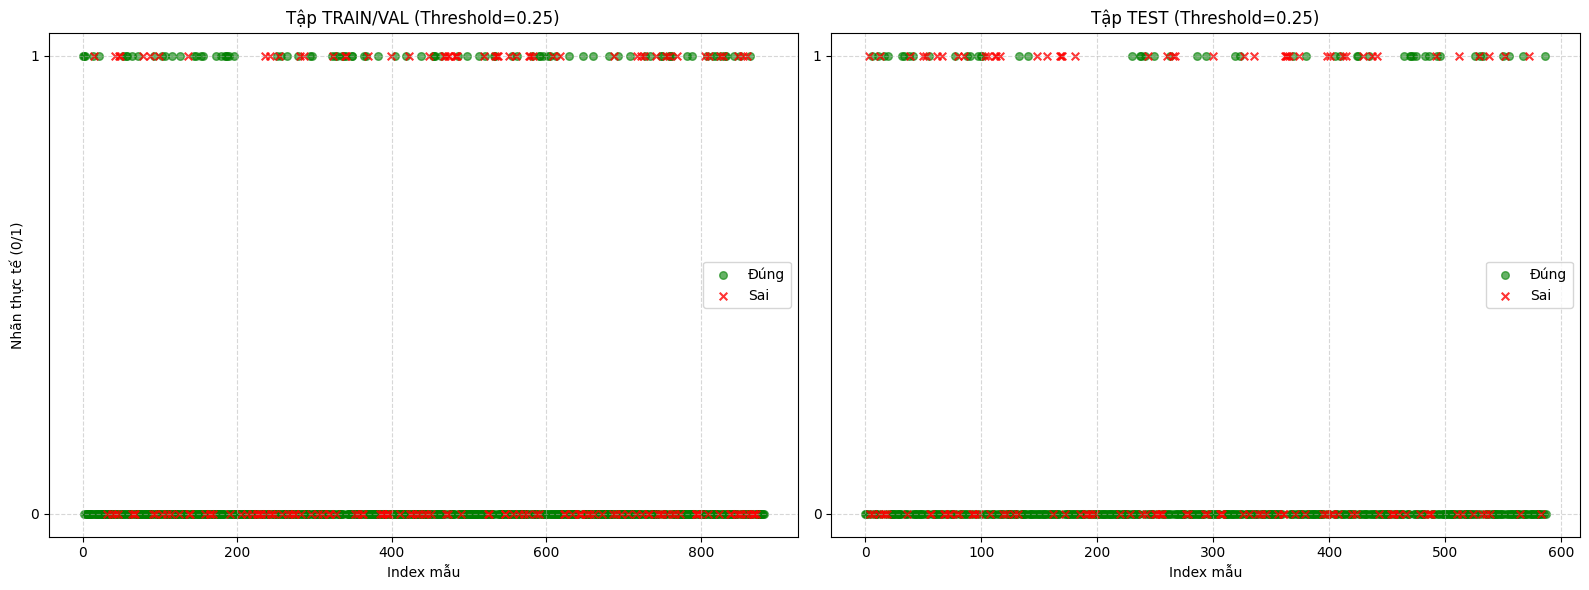

In [47]:
plot_prediction_comparison(
    model=rf_gini_skl   ,
    X_train_val=X_train_origin_t3,
    y_train_val=y_train_origin_t3,
    X_test=X_test_origin_t3,
    y_test=y_test_origin_t3,
    threshold=0.25
)

Class 0 (Hàng dưới): Mật độ điểm xanh (Dự đoán đúng) rất dày đặc. Mô hình học Class 0 rất tốt. Tuy nhiên, xuất hiện các dấu X đỏ rải rác -> Đây là cái giá của việc hạ threshold (tăng False Positive).

Class 1 (Hàng trên): Mật độ thưa hơn và sự xen kẽ giữa X đỏ (bỏ sót) và chấm xanh (bắt đúng) khá nhiều. Dù đã hạ threshold, mô hình vẫn bỏ sót khoảng một nửa số lượng Class 1.

Dựa trên các phân tích trên, mô hình ĐƯỢC ĐÁNH GIÁ LÀ PHÙ HỢP để triển khai với vai trò là Công cụ sàng lọc sơ cấp, vì:

- Trong bài toán này, việc bỏ sót đối tượng (Class 1) mang lại hậu quả nghiêm trọng hơn là cảnh báo nhầm. Do đó, chiến lược ưu tiên Recall là hoàn toàn đúng đắn.

- Mô hình giúp khoanh vùng và lọc ra khoảng 50% đối tượng nguy cơ cao để chuyển sang bước kiểm tra kỹ hơn bởi con người. Dù tỷ lệ báo động giả còn cao, nhưng nó giúp thu hẹp đáng kể phạm vi tìm kiếm so với việc kiểm tra ngẫu nhiên trên toàn bộ tập dữ liệu.